<a href="https://colab.research.google.com/github/mehraanjali/kmeans/blob/main/Clustering_Based_on_hp_and_weightlbs_of_cars_(kmeans).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

1. Apply K-Means Clustering (Non-Parametric Method) in the dataset belonging to your domain (of your choice).
2. Apply Elbow Method to find the optimum number of Clusters (value for ‘K’) and show the Elbow chart (plotting)
3. Make the ‘K’ number of clusters
4. Calculate the Centroids
5. Plot the results in a scatter plot.
6. Give your interpretations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

## Importing the dataset

In [ ]:
dataset = pd.read_csv(r"D:\PYTHON\ML CLASS\cars.csv")
X = dataset.iloc[:,:-1].values
X = pd.DataFrame(X)
X = X._convert(numeric=True)
X.columns = ['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60', 'year']
X.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


## Eliminating null values

In [ ]:
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
    print(X[i].isnull().sum())

0
0
0
0
0
0
0


In [ ]:
X.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
year            0
k_mean          0
dtype: int64

## Using the elbow method to find  the optimal number of clusters

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


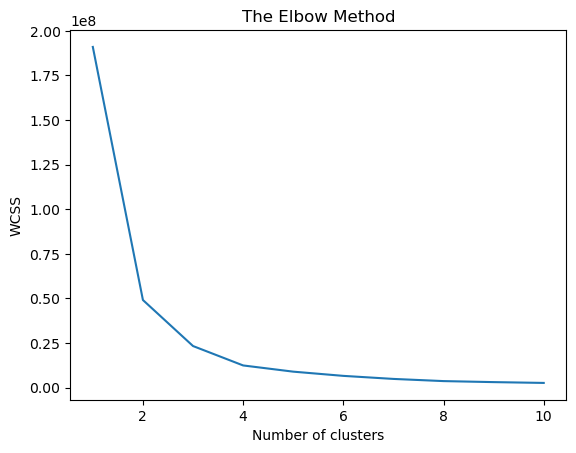

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Applying k-means to the cars dataset

In [ ]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
y_kmeans = kmeans.fit_predict(X)
X["k_mean"] = y_kmeans

In [ ]:
X

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,k_mean
0,14.0,8,350.0,165,4209.0,12,1972,2
1,31.9,4,89.0,71,1925.0,14,1980,1
2,17.0,8,302.0,140,3449.0,11,1971,0
3,15.0,8,400.0,150,3761.0,10,1971,2
4,30.5,4,98.0,63,2051.0,17,1978,1
...,...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980,2
257,36.1,4,91.0,60,1800.0,16,1979,1
258,22.0,6,232.0,112,2835.0,15,1983,0
259,18.0,6,232.0,100,3288.0,16,1972,0


In [ ]:
kmeans.cluster_centers_

array([[2.02012346e+01, 6.11111111e+00, 2.24716049e+02, 1.09074074e+02,
        3.19348148e+03, 1.56790123e+01, 1.97671605e+03],
       [2.95466102e+01, 4.05084746e+00, 1.07669492e+02, 7.70338983e+01,
        2.24153390e+03, 1.66101695e+01, 1.97771186e+03],
       [1.48064516e+01, 7.83870968e+00, 3.47274194e+02, 1.58629032e+02,
        4.23211290e+03, 1.33548387e+01, 1.97525806e+03]])

## Visualization

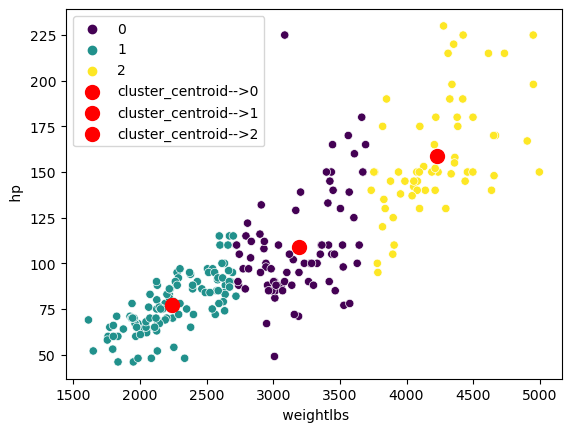

In [ ]:
sns.scatterplot(x = X.columns[4],y = X.columns[3],hue = X["k_mean"],data = X,palette="viridis" )
for i,j in enumerate(kmeans.cluster_centers_):
    plt.scatter(j[4],j[3],s = 100,c='red',label = f"cluster_centroid-->{i}")
plt.legend()